In [11]:
import requests
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join

In [12]:
# Where my json files are located
player_name = "Toby"
#player_name = "Josh"
#player_name = "Fred"
#player_name = "Emil"
#player_name = "Liam"
onlyfiles = [f for f in listdir(f"../{player_name}FaceitData/MatchStats") if isfile(join(f"../{player_name}FaceitData/MatchStats", f))]

In [13]:
#Rename columns
def rename_cols(text: str):
    text = text.split(".")[1]
    text = text.split(" ")
    text = "".join(list(map(str.capitalize, text)))
    return text

In [14]:
def create_df_from_json():
    df = pd.DataFrame()
    for ID in onlyfiles:
        path = f"../{player_name}FaceitData/MatchStats/{ID}"
        #print(path)
        with open(path, "r") as file:
           obj = json.load(file)["items"]
           obj = pd.json_normalize(obj)
        obj = obj.rename(columns=rename_cols)
        df = pd.concat([df, obj], ignore_index=True)
    return df


In [15]:
df_toby = create_df_from_json()
#df_josh = create_df_from_json()
#df_fred = create_df_from_json()
#df_emil = create_df_from_json()
#df_liam = create_df_from_json()

In [16]:
# Create picklle file if there are large amounts of json files
df_toby.to_pickle("TobyStats.pkl", compression="bz2")

In [17]:
df_toby

,Nickname,FinalScore,FirstHalfScore,UpdatedAt,MatchRound,TripleKills,Headshots,Kills,CompetitionId,OvertimeScore,...,Result,Winner,SecondHalfScore,Map,MatchId,GameMode,Headshots%,BestOf,Mvps,Assists
0,Toby__,8,8,2023-08-29T21:47:52.007Z,1,2,5,22,42e160fc-2651-4fa5-9a9b-829199e27adb,0,...,0,76151a51-4c09-4962-b3d1-29ab9df3afe2,0,de_vertigo,1-f1e3f72c-1036-4495-9bf3-ce197cbcb29e,5v5,23,2,2,4
1,Toby__,19,6,2023-08-29T21:01:54.665Z,1,0,8,24,42e160fc-2651-4fa5-9a9b-829199e27adb,4,...,1,ecfe4aac-18c8-4a27-a3de-f0cbde0010ac,9,de_mirage,1-09fac7f6-cb57-43ef-a15b-64b5f20d745a,5v5,33,2,4,6
2,Toby__,16,9,2023-08-29T17:58:40.053Z,1,0,8,22,42e160fc-2651-4fa5-9a9b-829199e27adb,0,...,1,ecfe4aac-18c8-4a27-a3de-f0cbde0010ac,7,de_inferno,1-c6e745cf-55d8-4acf-b429-fef71859678e,5v5,36,2,3,4
3,Toby__,16,9,2023-08-28T20:09:24.282Z,1,4,7,32,42e160fc-2651-4fa5-9a9b-829199e27adb,0,...,1,ef7b73df-1e6d-47bb-9072-50ba5a5de51a,7,de_inferno,1-8050cfd8-18fe-4e60-8a8f-0c4f63a39035,5v5,22,2,5,3
4,Toby__,16,13,2023-08-28T19:08:32.762Z,1,1,7,18,e056975c-09ff-4290-8fcd-596cd7295152,0,...,1,8d823704-d7e1-4b66-a026-ead8f88289b0,3,de_mirage,1-8ac51f5a-2360-4130-9a3c-6dc3d795f3e9,5v5,39,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,Toby__,9,4,2020-06-03T18:10:26.199Z,1,1,5,19,42e160fc-2651-4fa5-9a9b-829199e27adb,0,...,0,322aa6ff-e84a-466d-af0b-7a4d89b23829,5,de_inferno,1-06fdf079-17fb-4c7d-9c39-2095136e3243,5v5,26,1,1,6
1908,Toby__,12,6,2020-05-27T21:04:57.453Z,1,0,10,17,42e160fc-2651-4fa5-9a9b-829199e27adb,0,...,0,cff6c30a-fc8f-41c5-937f-7b486b9b573a,6,de_mirage,1-93e7f5e0-5a27-47ee-b04d-dc571fc55b80,5v5,59,1,1,1
1909,Toby__,16,10,2020-05-23T23:03:52.104Z,1,0,7,19,42e160fc-2651-4fa5-9a9b-829199e27adb,1,...,0,e2298e59-8cde-4d66-83ca-e926d29c07a0,5,de_train,1-b8779d40-9d0d-49c0-8f5c-945629900b0e,5v5,37,1,2,6
1910,Toby__,16,9,2020-05-23T13:54:05.179Z,1,1,13,33,42e160fc-2651-4fa5-9a9b-829199e27adb,0,...,1,cbc7de0a-a99c-4a9d-b2df-af81cf349a32,7,de_train,1-2cf65a2a-1b29-4688-8116-5b990b4bdc79,5v5,39,1,5,2


In [18]:
onlyfiles

['Match_Stats_0_100_toby.json',
 'Match_Stats_1000_1100_toby.json',
 'Match_Stats_100_200_toby.json',
 'Match_Stats_1100_1200_toby.json',
 'Match_Stats_1200_1300_toby.json',
 'Match_Stats_1300_1400_toby.json',
 'Match_Stats_1400_1500_toby.json',
 'Match_Stats_1500_1600_toby.json',
 'Match_Stats_1600_1700_toby.json',
 'Match_Stats_1700_1800_toby.json',
 'Match_Stats_1800_1900_toby.json',
 'Match_Stats_1900_2000_toby.json',
 'Match_Stats_200_300_toby.json',
 'Match_Stats_300_400_toby.json',
 'Match_Stats_400_500_toby.json',
 'Match_Stats_500_600_toby.json',
 'Match_Stats_600_700_toby.json',
 'Match_Stats_700_800_toby.json',
 'Match_Stats_800_900_toby.json',
 'Match_Stats_900_1000_toby.json']

In [19]:
# Put datatypes into df and cleansed df

type = {
    "PlayerId": str,
    "CreatedAt": "datetime64[ns]",
    "Kills": int,
    "Deaths": int,
    "Assists": int,
    "K/dRatio": float,
    "K/rRatio": float,
    "Headshots": int,
    "Headshots%": int,
    "FirstHalfScore": int,
    "SecondHalfScore": int,
    "TripleKills": int,
    "QuadroKills": int,
    "PentaKills": int,
    "Headshots%": int,
    "Mvps": int,
    "OvertimeScore": int,
    "Rounds": int,
    "Result": int,
}

df_toby = df_toby.astype(type, errors="ignore")
df_toby.dropna(how="any", inplace=True)
df_toby['Score'] = df_toby['Score'].str.replace(" / ", ":")
df_toby = df_toby
#df_jj['Result'] = df_jj["Result"].astype(int).replace({1: "Win", 0: "Loss"})


In [20]:
# Clean CreateAt Column

df_toby['CreatedAt'] = df_toby['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_toby= df_toby[df_toby['CreatedAt'].str.len() > 22]


In [21]:

df_toby['CreatedAt'] = df_toby['CreatedAt'].astype("datetime64[ns]")
df_toby["DateOrdinal"] = df_toby['CreatedAt'].apply(lambda x: x.toordinal())


df_toby["Year"] = df_toby['CreatedAt'].dt.year
df_toby["Month"] = df_toby['CreatedAt'].dt.month
df_toby["Date"] = df_toby['CreatedAt'].dt.day

In [22]:

rename_all_maps = {
    "de_mirage": "Mirage",
    "de_inferno": "Inferno",
    "de_train": "Train",
    "de_overpass": "Overpass",
    "de_cache": "Cache",
    "de_nuke": "Nuke",
    "de_vertigo": "Vertigo",
    "de_dust2": "Dust2",
    "de_ancient": "Ancient",
    "de_cbble": "Cobblestone",
    "de_anubis": "Anubis"
}

df_toby = df_toby.replace({"Map": rename_all_maps})
df_toby.sort_values(by="CreatedAt", ascending=True, inplace=True)
df_toby = df_toby.groupby('Map').filter(lambda x: len(x)>2)


In [23]:
df_toby

,Nickname,FinalScore,FirstHalfScore,UpdatedAt,MatchRound,TripleKills,Headshots,Kills,CompetitionId,OvertimeScore,...,MatchId,GameMode,Headshots%,BestOf,Mvps,Assists,DateOrdinal,Year,Month,Date
1111,MiniTwister,2,2,2017-07-10T18:25:21.212Z,1,0,2,5,,0,...,4986000c-d9ea-4798-9941-a34cdfe4f71f,5v5,40,1,1,3,736520,2017,7,10
1110,MiniTwister,7,7,2017-08-20T21:54:33.25Z,1,1,8,15,,0,...,695a85f6-ca6d-4b36-ac29-edcfb3d5bc40,5v5,53,1,2,4,736561,2017,8,20
1108,MiniTwister,16,12,2017-12-14T20:39:40.361Z,1,2,4,22,,0,...,5a7b554f-9b65-43ad-9a17-a7b7a61d63da,5v5,18,1,2,4,736677,2017,12,14
1107,MiniTwister,13,12,2017-12-21T20:15:41.618Z,1,0,2,12,,0,...,99c54b3e-dc65-4442-bb3d-952ba334322c,5v5,17,1,0,5,736684,2017,12,21
1106,MiniTwister,10,5,2018-04-04T14:09:09.413Z,1,1,3,14,,0,...,5316d7c5-1f76-4427-bbf3-5ab6e69378d9,5v5,21,1,1,3,736788,2018,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Toby__,7,5,2023-08-28T18:01:19.495Z,1,2,6,19,42e160fc-2651-4fa5-9a9b-829199e27adb,0,...,1-f64e40c1-7068-4a5b-a5da-7e2136c63f29,5v5,32,2,1,0,738760,2023,8,28
4,Toby__,16,13,2023-08-28T19:08:32.762Z,1,1,7,18,e056975c-09ff-4290-8fcd-596cd7295152,0,...,1-8ac51f5a-2360-4130-9a3c-6dc3d795f3e9,5v5,39,2,2,2,738760,2023,8,28
3,Toby__,16,9,2023-08-28T20:09:24.282Z,1,4,7,32,42e160fc-2651-4fa5-9a9b-829199e27adb,0,...,1-8050cfd8-18fe-4e60-8a8f-0c4f63a39035,5v5,22,2,5,3,738760,2023,8,28
2,Toby__,16,9,2023-08-29T17:58:40.053Z,1,0,8,22,42e160fc-2651-4fa5-9a9b-829199e27adb,0,...,1-c6e745cf-55d8-4acf-b429-fef71859678e,5v5,36,2,3,4,738761,2023,8,29


In [24]:
#Displaying JJ stats (My Own)

#Displaying Maps and Other stats

Maps_Stats_df_toby = (
    df_toby.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)


C:\Users\jaceh\AppData\Local\Temp\ipykernel_16456\867349602.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_toby.groupby(by="Map").aggregate(


In [25]:
Maps_Stats_df_toby

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins
Map,,,,,,,,
Ancient,31,593,105,617,83,8.935484,45.741935,14
Cache,79,1592,265,1470,237,7.329114,36.696203,40
Cobblestone,5,59,15,68,5,5.000000,33.600000,2
Dust2,34,636,118,728,74,7.941176,43.529412,7
Inferno,371,7221,1369,6990,1026,7.819407,40.805930,193
Mirage,569,11344,2128,10895,1631,7.956063,40.597540,299
Nuke,100,1844,360,1908,273,7.110000,39.920000,51
Overpass,229,4575,842,4345,633,7.886463,40.379913,109
Train,245,5000,906,4540,712,8.016327,40.375510,144


In [32]:

Maps_Stats_df_toby["Losses"] = (Maps_Stats_df_toby["Matches"] - Maps_Stats_df_toby["Wins"]).astype(int)
Maps_Stats_df_toby["Winrate%"] = (((Maps_Stats_df_toby["Wins"] / Maps_Stats_df_toby["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_toby["Headshots"] = (Maps_Stats_df_toby["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_toby["Headshots%"] = (Maps_Stats_df_toby["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_toby["Matches"].astype(int)
Maps_Stats_df_toby.sort_values(by="Matches", ascending=False, inplace=True)

Maps_Stats_df_toby

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins,Losses,Winrate%
Map,,,,,,,,,,
Mirage,569,11344,2128,10895,1631,7.96,40.60,299,270,52.55
Inferno,371,7221,1369,6990,1026,7.82,40.81,193,178,52.02
Train,245,5000,906,4540,712,8.02,40.38,144,101,58.78
Overpass,229,4575,842,4345,633,7.89,40.38,109,120,47.60
Nuke,100,1844,360,1908,273,7.11,39.92,51,49,51.00
Cache,79,1592,265,1470,237,7.33,36.70,40,39,50.63
Vertigo,65,1320,230,1241,174,7.98,39.26,34,31,52.31
Dust2,34,636,118,728,74,7.94,43.53,7,27,20.59
Ancient,31,593,105,617,83,8.94,45.74,14,17,45.16


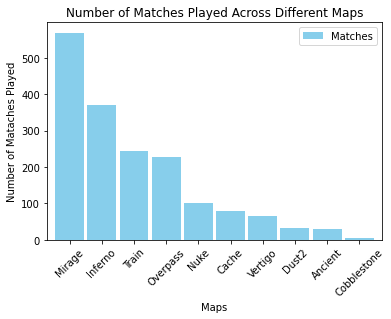

In [27]:

#Number of matches played across different maps
Maps_Stats_df_toby.plot.bar(y = "Matches", color = "skyblue", title = 'Number of Matches Played Across Different Maps', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

#plt.show()
